In [1]:
import matplotlib.pyplot as plt
def get_columns(total_count, source):
    with open(source, 'r') as content_file:
        content = content_file.read()
        pass
    counter=0
    prev=0
    for item in content.split():
        if (counter%total_count)==0:
            if counter>0:
                if line[0]<=prev:
                    print(line)
                    print("WRONG")
                    return
                yield line
                prev=line[0]
                pass
            line=[]
            pass
        line.append(float(item))
        counter+=1
        pass
    if counter>0:
        yield line
        pass
    pass

def prepare_data(compr,source, reg):
    districts=[0]*(100//compr)
    voices=[0]*(100//compr)
    for (idn,count, attendance) in source:
        if idn in reg:
            index=int(attendance*100/compr)
            if index>=len(districts):
                print("out of range for id",idn)
                pass
            else:
                districts[index] += 1
                voices[index] += count/1000000
                pass
            pass
        pass
    return districts,voices

#codes of election districts
crimea={1,2,3,4,5,6,7,8,9,10}
vin={11,12,13,14,15,16,17,18}
vol={19,20,21,22,23}
dp={24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40}
dn={41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61}
zhy={62,63,64,65,66,67}
zak={68,69,70,71,72,73}
zp={74,75,76,77,78,79,80,81,82}
fra={83,84,85,86,87,88,89}
kyiv_reg={90,91,92,93,94,95,96,97,98}
krop={99,100,101,102,103}
lg={104,105,106,107,108,109,110,111,112,113,114}
lv={115,116,117,118,119,120,121,122,123,124,125,126}
myk={127,128,129,130,131,132}
od={133,134,135,136,137,138,139,140,141,142,143}
pol={144,145,146,147,148,149,150,151}
riv={152,153,154,155,156}
sumy={157,157,158,159,160,161,162}
tern={163,164,165,166,167}
kharkiv={168,169,170,171,172,173,174,175,176,177,178,179,180,181}
kherson={182,183,184,185,186}
khmel={187,188,189,190,191,192,193}
cherk={194,195,196,197,198,199,200}
chernivtsi={201,202,203,204}
chernihiv={205,206,207,208,209,210}
kyiv_city={211,212,213,214,215,216,217,218,219,220,221,222,223}
sebastopol={224,225}
foreign={333}

west=zak|fra|lv|tern|khmel|chernivtsi|riv|vol
center=vin|krop|cherk|pol|dp
north=zhy|kyiv_reg|chernihiv|sumy|kyiv_city
east=dn|lg|kharkiv
south=od|kherson|myk|zp|crimea|sebastopol
ua=west|east|north|south|center

compr=10

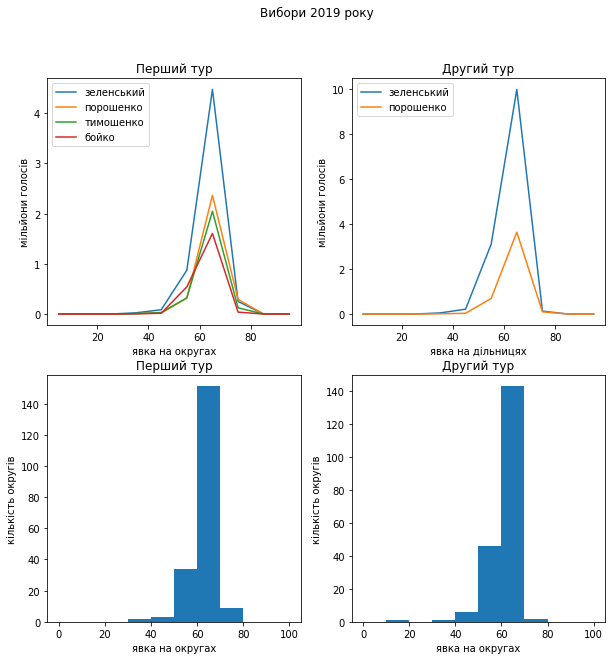

In [7]:
def get_attendance(name):
    for item in get_columns(13,name):
        yield [item[0], item[9]/item[4]]
        pass
    pass

candidates1={
        "бойко": ("ukr_2019/3103-candidates1.txt",5, 22),
        "вілкул": ("ukr_2019/3103-candidates1.txt",8,22),
        "гриценко": ("ukr_2019/3103-candidates1.txt",10,22),
        "зеленський": ("ukr_2019/3103-candidates1.txt",14,22),
        "кошулинський": ("ukr_2019/3103-candidates1.txt",19,22),    
        "порошенко": ("ukr_2019/3103-candidates2.txt",9,20),    
        "тимошенко": ("ukr_2019/3103-candidates2.txt",15,20),    
        "всі": ("ukr_2019/3103-candidates2.txt",19,20)    
    }

def get_1st_for(name):
    cand=candidates1[name]
    for att,voices in zip(get_attendance("ukr_2019/3103-general.txt"),get_columns(cand[2],cand[0])):
        if att[0]==voices[0]:
            yield (att[0],voices[cand[1]],att[1])
            pass
        else:
            print("MISMATCH",att[0],voices[0])
            return
            pass
        pass
    pass

candidates2={
        "зеленський": ("ukr_2019/3004-candidates.txt",1,6),
        "порошенко": ("ukr_2019/3004-candidates.txt",3,6),    
    }

def get_2nd_for(name):
    cand=candidates2[name]
    for att,voices in zip(get_attendance("ukr_2019/3004-general.txt"),get_columns(cand[2],cand[0])):
        if att[0]==voices[0]:
            yield (att[0],voices[cand[1]],att[1])
            pass
        else:
            print("MISMATCH",att[0],voices[0])
            return
            pass
        pass
    pass
fig=plt.figure()
fig.set_size_inches(10 , 10, forward=True)
fig.suptitle("Вибори 2019 року")
fig.show()

ax=fig.add_subplot(221)
for name in ["зеленський","порошенко","тимошенко","бойко"]:
    districts,voices=prepare_data(compr,get_1st_for(name),ua)
    ax.plot([x*compr+compr/2 for x in range(len(voices))],voices, label=name)
    pass
ax.title.set_text("Перший тур")
ax.set_xlabel("явка на округах")
ax.set_ylabel("мільйони голосів")
ax.legend(loc=2)
ax=fig.add_subplot(223)
ax.bar([x*compr+compr/2 for x in range(len(districts))],districts, label=name, width=10)
ax.title.set_text("Перший тур")
ax.set_xlabel("явка на округах")
ax.set_ylabel("кількість округів")

ax=fig.add_subplot(222)
for name in ["зеленський","порошенко"]:
    districts,voices=prepare_data(compr,get_2nd_for(name),ua)
    ax.plot([x*compr+compr/2 for x in range(len(voices))],voices, label=name)
    pass
ax.title.set_text("Другий тур")
ax.set_xlabel("явка на дільницях")
ax.set_ylabel("мільйони голосів")
ax.legend(loc=2)
ax=fig.add_subplot(224)
ax.bar([x*compr+compr/2 for x in range(len(districts))],districts, label=name, width=10)
ax.title.set_text("Другий тур")
ax.set_xlabel("явка на округах")
ax.set_ylabel("кількість округів")

plt.draw()


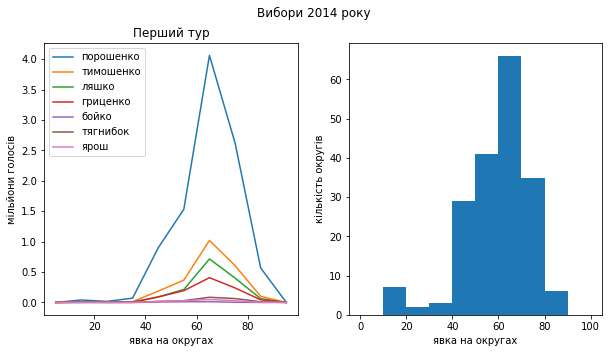

In [3]:
def get_attendance(name):
    for item in get_columns(13,name):
        yield [item[0], item[9]/item[4]]
        pass
    pass

candidates2={
        "бойко": ("ukr_2014/candidates.txt",2,23),
        "гриценко": ("ukr_2014/candidates.txt",4,23),
        "ляшко": ("ukr_2014/candidates.txt",10,23),
        "порошенко": ("ukr_2014/candidates.txt",12,23),
        "тимошенко": ("ukr_2014/candidates.txt",16,23),
        "тягнибок": ("ukr_2014/candidates.txt",18,23),
        "ярош": ("ukr_2014/candidates.txt",21,23)    
    }

def get_for(name):
    cand=candidates2[name]
    for att,voices in zip(get_attendance("ukr_2014/general.txt"),get_columns(cand[2],cand[0])):
        if att[0]==voices[0]:
            yield (att[0],voices[cand[1]],att[1])
            pass
        else:
            print("MISMATCH",att[0],voices[0])
            return
            pass
        pass
    pass

fig=plt.figure()
fig.set_size_inches(10 , 5, forward=True)
fig.suptitle("Вибори 2014 року")
fig.show()
ax=fig.add_subplot(121)
for name in ["порошенко","тимошенко","ляшко",  "гриценко", "бойко" ,"тягнибок","ярош"]:
    districts,voices=prepare_data(compr,get_for(name),ua)
    ax.plot([x*compr+compr/2 for x in range(len(voices))],voices, label=name)
    pass
ax.title.set_text("Перший тур")
ax.set_xlabel("явка на округах")
ax.set_ylabel("мільйони голосів")
ax.legend(loc=2)
ax=fig.add_subplot(122)
ax.bar([x*compr+compr/2 for x in range(len(districts))],districts, label=name, width=10);
ax.set_xlabel("явка на округах")
ax.set_ylabel("кількість округів")

plt.draw()

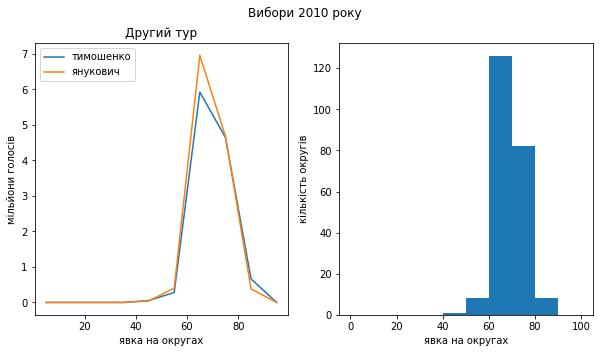

In [4]:
def get_attendance(name):
    for item in get_columns(10,name):
        yield [item[0], item[6]/item[3]]
        pass
    pass

candidates2={
        "тимошенко": ("ukr_2010/candidates.txt",1,6),
        "янукович": ("ukr_2010/candidates.txt",3,6)    
    }

def get_2nd_for(name):
    cand=candidates2[name]
    for att,voices in zip(get_attendance("ukr_2010/general.txt"),get_columns(cand[2],cand[0])):
        if att[0]==voices[0]:
            yield (att[0],voices[cand[1]],att[1])
            pass
        else:
            print("MISMATCH",att[0],voices[0])
            return
            pass
        pass
    pass

fig=plt.figure()
fig.set_size_inches(10 , 5, forward=True)
fig.suptitle("Вибори 2010 року")
fig.show()
ax=fig.add_subplot(121)
for name in ["тимошенко","янукович"]:
    districts,voices=prepare_data(compr,get_2nd_for(name),ua)
    ax.plot([x*compr+compr/2 for x in range(len(voices))],voices, label=name)
    pass
ax.title.set_text("Другий тур")
ax.set_xlabel("явка на округах")
ax.set_ylabel("мільйони голосів")
ax.legend(loc=2)
ax=fig.add_subplot(122)
ax.bar([x*compr+compr/2 for x in range(len(districts))],districts, label=name, width=10);
ax.set_xlabel("явка на округах")
ax.set_ylabel("кількість округів")


plt.draw()

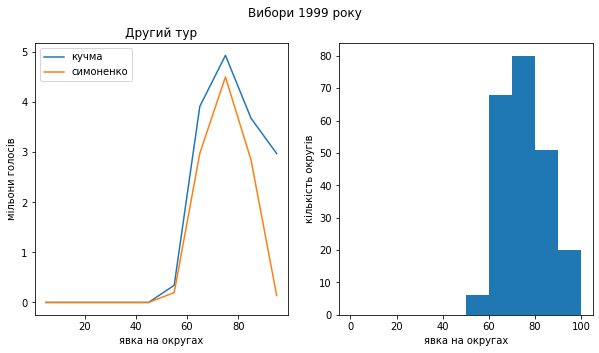

In [5]:
def get_attendance(name):
    for item in get_columns(9,name):
        yield [item[0], item[4]/item[1]]
        pass
    pass

candidates2={
        "кучма": ("ukr_1999/1411-kuczma.txt",3,4),    
        "симоненко": ("ukr_1999/1411-simon.txt",3,4)    
    }

def get_2nd_for(name):
    cand=candidates2[name]
    for att,voices in zip(get_attendance("ukr_1999/1411-general.txt"),get_columns(cand[2],cand[0])):
        if att[0]==voices[0]:
            yield (att[0],voices[cand[1]],att[1])
            pass
        else:
            print("MISMATCH",att[0],voices[0])
            return
            pass
        pass
    pass

fig=plt.figure()
fig.set_size_inches(10 , 5, forward=True)
fig.suptitle("Вибори 1999 року")
fig.show()
ax=fig.add_subplot(121)
for name in ["кучма","симоненко"]:
    districts,voices=prepare_data(compr,get_2nd_for(name),ua)
    ax.plot([x*compr+compr/2 for x in range(len(voices))],voices, label=name);
    pass
ax.title.set_text("Другий тур")
ax.set_xlabel("явка на округах")
ax.set_ylabel("мільони голосів")
ax.legend(loc=2)
ax=fig.add_subplot(122)
ax.bar([x*compr+compr/2 for x in range(len(districts))],districts, label=name,width=10);
ax.set_xlabel("явка на округах")
ax.set_ylabel("кількість округів")

plt.draw()